## Need to get accurate detection working.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
num_cores = multiprocessing.cpu_count()
print num_cores
if num_cores == 32:
    num_cores = 16

import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

class sizeme():
    """ Class to change html fontsize of object's representation"""
    def __init__(self,ob, size=50, height=120):
        self.ob = ob
        self.size = size
        self.height = height
    def _repr_html_(self):
        repl_tuple = (self.size, self.height, self.ob._repr_html_())
        return u'<span style="font-size:{0}%; line-height:{1}%">{2}</span>'.format(*repl_tuple)

pd.options.display.max_columns = 9999
pd.set_option('display.width', 9999)

32


In [2]:
import diffimTests as dit
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., 
                         #varSourceChange=[1500., 1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         varSourceChange=[1500., 1500., 1500.],
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=13)

print dit.computeClippedImageStats(testObj.im1.im)
print dit.computeClippedImageStats(testObj.im2.im)
print dit.computeClippedImageStats(testObj.im1.var)
print dit.computeClippedImageStats(testObj.im2.var)

(0.058941207521673616, 17.142582277831181, -74.0, 1741.5550996425638)
(0.16737836510966672, 17.213964844536303, -82.0, 1169.0572762553779)
(300.05894120752163, 17.142582277831185, 226.0, 2041.5550996425638)
(300.16737836510964, 17.213964844536303, 218.0, 1469.0572762553779)


In [3]:
src = testObj.runTest(returnSources=True)

/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


In [4]:
changedCentroid = np.array(testObj.centroids[testObj.changedCentroidInd, :])
print changedCentroid

#print src['AL'][['base_NaiveCentroid_x', 'base_NaiveCentroid_y', 'base_PsfFlux_fluxSigma', 'base_PsfFlux_flag']]
print src['ALstack'][['base_NaiveCentroid_x', 'base_NaiveCentroid_y', 'base_PsfFlux_fluxSigma', 'base_PsfFlux_flag']]
print src['ALstack_noDecorr'][['base_NaiveCentroid_x', 'base_NaiveCentroid_y', 'base_PsfFlux_fluxSigma', 'base_PsfFlux_flag']]
print src['ZOGY'][['base_NaiveCentroid_x', 'base_NaiveCentroid_y', 'base_PsfFlux_fluxSigma', 'base_PsfFlux_flag']]
# For SZOGY, the correct flux measurement is PeakLikelihoodFlux
print src['SZOGY'][['base_NaiveCentroid_x', 'base_NaiveCentroid_y', 'base_PeakLikelihoodFlux_fluxSigma', 'base_PsfFlux_flag']]

[[   245.89925013    279.36159005   1423.89964966   2923.89964966]
 [   287.15359438    287.4644825   11199.22125222  12699.22125222]
 [   262.66886207    301.46927489  20097.66173206  21597.66173206]]
   base_NaiveCentroid_x  base_NaiveCentroid_y  base_PsfFlux_fluxSigma base_PsfFlux_flag
1            245.307952            278.275991              177.827785             False
2            286.278808            287.187174              220.662937             False
3            262.222089            301.121689              261.953192             False
   base_NaiveCentroid_x  base_NaiveCentroid_y  base_PsfFlux_fluxSigma base_PsfFlux_flag
0            415.108090             35.051215              235.803134             False
1            245.275114            278.249775              140.383571             False
2            286.249276            287.167884              182.561722             False
3            262.198493            301.115166              214.287964             False
   bas

In [3]:
reload(dit)

# Let's try w same parameters as ZOGY paper.
sky = 300.

testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., 
                         varSourceChange=[1500.], #1600., 1800., 2000., 2200., 2400., 2600., 2800.],
                         theta1=0., theta2=-45., im2background=0., n_sources=50, sourceFluxRange=(500,30000), 
                         seed=66, psfSize=13)

det = testObj.runTest()
print det

/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/home/reiss/miniconda2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:1147: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


{'ZOGY': {'FP': 0, 'FN': 0, 'TP': 1}, 'ALstack': {'FP': 0, 'FN': 0, 'TP': 1}, 'SZOGY': {'FP': 1, 'FN': 0, 'TP': 1}, 'ALstack_noDecorr': {'FP': 1, 'FN': 0, 'TP': 1}}


Try some real tests!

In [4]:
# Default 10 sources with same flux
def runTest(flux, seed=66, sky=300., n_sources=50, n_varSources=1):
    #methods = ['ALstack', 'ZOGY', 'ZOGY_S', 'ALstack_noDecorr']
    testObj = dit.DiffimTest(imSize=(512,512), sky=sky, offset=[0,0], psf_yvary_factor=0., 
                             varSourceChange=np.repeat(flux, n_varSources),
                             theta1=0., theta2=-45., im2background=0., n_sources=n_sources, 
                             sourceFluxRange=(500,30000), seed=seed, psfSize=13)
    det = testObj.runTest() #subtractMethods=methods) #, 'AL'])
    det['flux'] = flux
    return det

methods = ['ALstack', 'ZOGY', 'SZOGY', 'ALstack_noDecorr']

## Look at detection rates for 5.0-sigma sources.

In [7]:
inputs = [(f, seed) for f in [1500] for seed in np.arange(66, 1066, 1)]
print len(inputs)
testResults1 = Parallel(n_jobs=num_cores, verbose=2)(delayed(runTest)(i[0], i[1], n_sources=100, n_varSources=10) \
                                                     for i in inputs)

1000


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   14.2s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.5min
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:  4.0min
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:  7.3min
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed: 11.5min finished


FN: 
ALstack             1.681
ALstack_noDecorr    1.626
SZOGY               1.514
ZOGY                1.751
dtype: float64
FP: 
ALstack             0.373
ALstack_noDecorr    0.953
SZOGY               0.318
ZOGY                0.572
dtype: float64
TP: 
ALstack             8.319
ALstack_noDecorr    8.374
SZOGY               8.486
ZOGY                8.249
dtype: float64


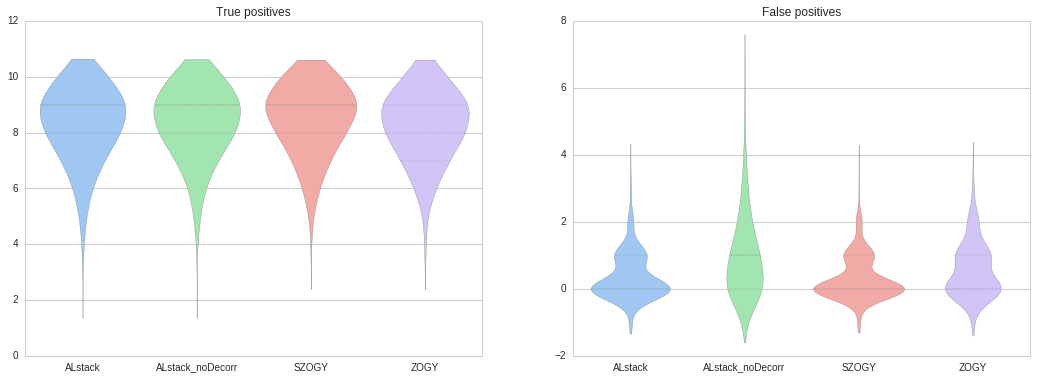

In [8]:
tr = testResults1
FN = pd.DataFrame({key: np.array([t[key]['FN'] for t in tr]) for key in methods})
FP = pd.DataFrame({key: np.array([t[key]['FP'] for t in tr]) for key in methods})
TP = pd.DataFrame({key: np.array([t[key]['TP'] for t in tr]) for key in methods})
print 'FN:', '\n', FN.mean()
print 'FP:', '\n', FP.mean()
print 'TP:', '\n', TP.mean()

matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.violinplot(data=TP, inner="quart", cut=True, linewidth=0.3, bw=0.5, ax=axes[0])
axes[0].set_title('True positives')
sns.violinplot(data=FP, inner="quart", cut=True, linewidth=0.3, bw=0.5, ax=axes[1])
axes[1].set_title('False positives')

## Look at detection rates for 3.33-sigma sources.

In [5]:
inputs = [(f, seed) for f in [1000] for seed in np.arange(66, 1066, 1)]
print len(inputs)
testResults2 = Parallel(n_jobs=num_cores, verbose=2)(delayed(runTest)(i[0], i[1], n_sources=100, n_varSources=10) \
                                                     for i in inputs)

1000


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   14.3s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.4min
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:  3.7min
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:  6.6min
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed: 10.4min finished


FN: 
ALstack             4.238
ALstack_noDecorr    4.106
SZOGY               2.293
ZOGY                2.835
dtype: float64
FP: 
ALstack             0.520
ALstack_noDecorr    0.872
SZOGY               0.744
ZOGY                1.185
dtype: float64
TP: 
ALstack             5.762
ALstack_noDecorr    5.894
SZOGY               7.707
ZOGY                7.165
dtype: float64


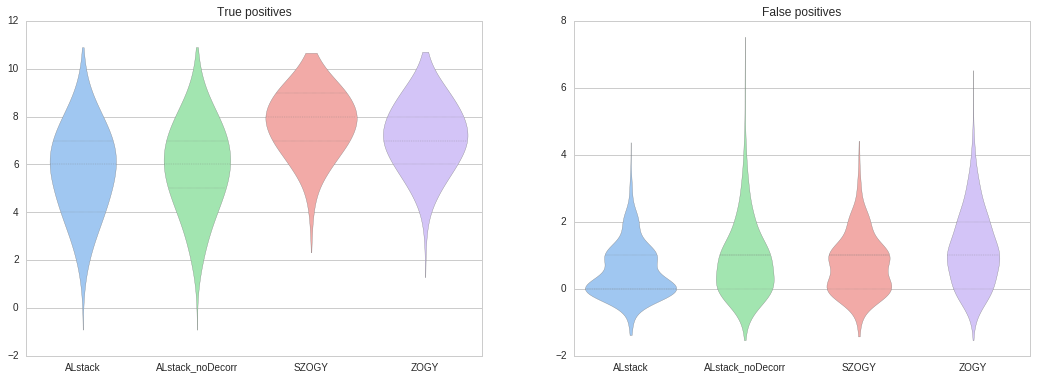

In [6]:
tr = testResults2
FN = pd.DataFrame({key: np.array([t[key]['FN'] for t in tr]) for key in methods})
FP = pd.DataFrame({key: np.array([t[key]['FP'] for t in tr]) for key in methods})
TP = pd.DataFrame({key: np.array([t[key]['TP'] for t in tr]) for key in methods})
print 'FN:', '\n', FN.mean()
print 'FP:', '\n', FP.mean()
print 'TP:', '\n', TP.mean()

matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.violinplot(data=TP, inner="quart", cut=True, linewidth=0.3, bw=0.5, ax=axes[0])
axes[0].set_title('True positives')
sns.violinplot(data=FP, inner="quart", cut=True, linewidth=0.3, bw=0.5, ax=axes[1])
axes[1].set_title('False positives')

## For fun, try some 10-sigma sources.

In [7]:
inputs = [(f, seed) for f in [3000] for seed in np.arange(66, 1066, 1)]
print len(inputs)
testResults3 = Parallel(n_jobs=num_cores, verbose=2)(delayed(runTest)(i[0], i[1], n_sources=100, n_varSources=10) \
                                                     for i in inputs)

1000


[Parallel(n_jobs=16)]: Done   9 tasks      | elapsed:   15.2s
[Parallel(n_jobs=16)]: Done 130 tasks      | elapsed:  1.4min
[Parallel(n_jobs=16)]: Done 333 tasks      | elapsed:  3.4min
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:  6.3min
[Parallel(n_jobs=16)]: Done 1000 out of 1000 | elapsed: 10.1min finished


FN: 
ALstack             1.810
ALstack_noDecorr    1.793
SZOGY               1.755
ZOGY                1.747
dtype: float64
FP: 
ALstack             0.709
ALstack_noDecorr    1.345
SZOGY               0.156
ZOGY                0.148
dtype: float64
TP: 
ALstack             8.190
ALstack_noDecorr    8.207
SZOGY               8.245
ZOGY                8.253
dtype: float64


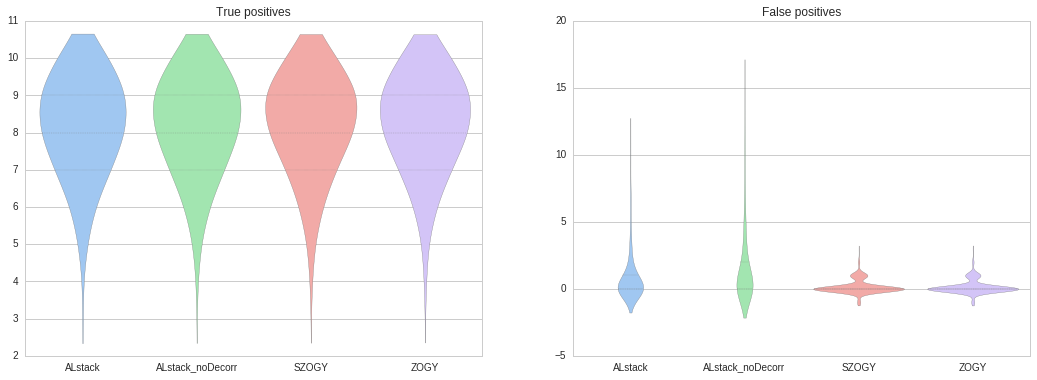

In [9]:
tr = testResults3
FN = pd.DataFrame({key: np.array([t[key]['FN'] for t in tr]) for key in methods})
FP = pd.DataFrame({key: np.array([t[key]['FP'] for t in tr]) for key in methods})
TP = pd.DataFrame({key: np.array([t[key]['TP'] for t in tr]) for key in methods})
print 'FN:', '\n', FN.mean()
print 'FP:', '\n', FP.mean()
print 'TP:', '\n', TP.mean()

matplotlib.rcParams['figure.figsize'] = (18.0, 6.0)
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.violinplot(data=TP, inner="quart", cut=True, linewidth=0.3, bw=0.5, ax=axes[0])
axes[0].set_title('True positives')
sns.violinplot(data=FP, inner="quart", cut=True, linewidth=0.3, bw=0.5, ax=axes[1])
axes[1].set_title('False positives')